In [16]:
# !pip install pandas
import pandas as pd
import os

In [17]:
file_dir = "/home/huyhoang/Workspace/DIT-Master/MSS-2/AlgorithmAutonomousSystems/rcognita-edu/rosdata/N_CTRL/Init_angle_1.5707963267948966_seed_1_Nactor_3/"
fn = os.listdir(file_dir)
fn = sorted(fn, key=lambda x: int(x.split(".")[0]))[-1]

file_path = os.path.join(
    file_dir,
    fn
)
with open(file_path) as f:
    data = f.read().splitlines()[20:]

data
fn

'1715589061.501718__3wrobotNI__N_CTRL__2024-05-13__10h31m01s__run01.csv'

In [18]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
df

,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]
0,6.168,0.000000,0.000000,0.000000,1.0,0.01,0.000000,0.000000
1,6.218,2.998047,3.004274,-1.825885,1.0,0.02,0.636643,-0.223612
2,6.268,2.998022,3.004174,-1.830415,1.0,0.03,0.636629,-0.222709
3,6.318,2.997884,3.003659,-1.837984,1.0,0.04,0.636560,-0.221211
4,6.369,2.997166,3.001126,-1.853131,1.0,0.05,0.636215,-0.218257
...,...,...,...,...,...,...,...,...
635,37.921,-0.117796,-0.029147,-0.231329,1.0,6.36,0.018202,0.106907
636,37.968,-0.116666,-0.029410,-0.224131,1.0,6.37,0.018047,0.106563
637,38.018,-0.116111,-0.029537,-0.220591,1.0,6.38,0.017971,0.106393
638,38.068,-0.114996,-0.029785,-0.213431,1.0,6.39,0.017819,0.106045


<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

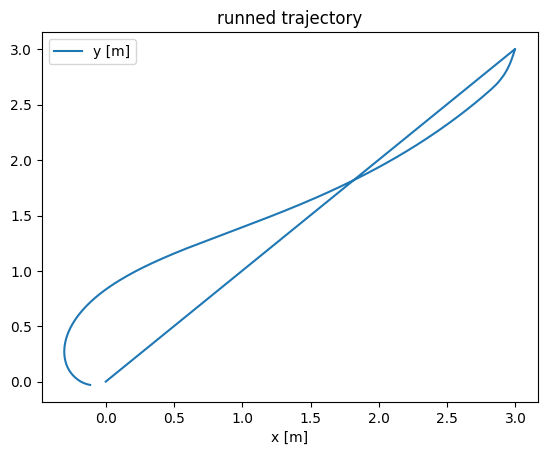

In [19]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

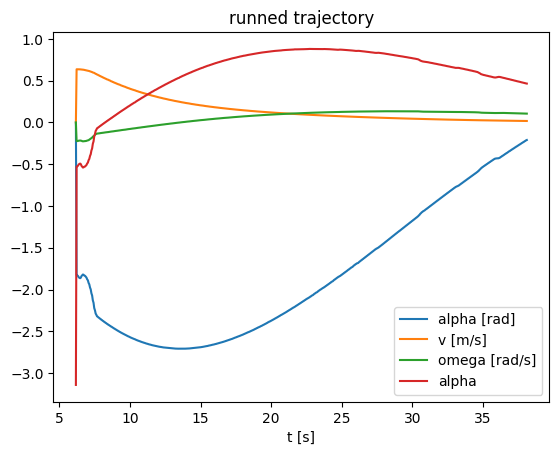

In [20]:
import numpy as np

df["alpha"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha"], title="runned trajectory")